<a href="https://colab.research.google.com/github/AlvaroLopezLoayza/modelo-regresion/blob/main/regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# 1. Cargar los datos
data = pd.read_csv('datos_dengue_normalizado.csv')

In [33]:
# 2. Visualizar los datos
print(data.head())

   ubigeo   1   2   3   4   5   6   7   8   9  ...  44  45  46  47  48  49  \
0   10101   0   0   0   1   0   0   0   0   1  ...   0   1   0   0   0   0   
1   10103  12   4   3   1   5   0   1   0   0  ...   0   0   0   0   0   0   
2   10201  42  52  60  55  69  54  63  64  76  ...  69  85  87  89  81  70   
3   10202   4   1   3   3   0   1   0   2   6  ...  28  13  11   2   3   2   
4   10203  12   8  11  13  11  13  14   2   4  ...   4   4   3   3   7   7   

   50  51  52  53  
0   2   0   0   0  
1   1  10  15   0  
2  82  62  50   8  
3   3   3   2   1  
4   6   6   8   5  

[5 rows x 54 columns]


In [34]:
# 3. Preprocesar los datos
# Transponer el DataFrame para que las semanas sean las columnas
data_transposed = data.set_index('ubigeo').T
data_transposed = data_transposed.reset_index()
data_transposed.rename(columns={'index': 'week'}, inplace=True)

In [35]:
# Convertir la columna 'week' a un tipo numérico
data_transposed['week'] = data_transposed['week'].astype(int)

In [36]:
# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X = data_transposed['week'].values.reshape(-1, 1)
models = {}
results = {}

In [37]:
# 5. Entrenar diferentes modelos de regresión
for index,row in data.iterrows():
    ubigeo = row['ubigeo']
    print(ubigeo)
    y = data_transposed[ubigeo].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    # Decision Tree Regressor
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)

    # Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    # Support Vector Regressor
    svr = SVR()
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test)

    # Gradient Boosting Regressor
    gbr = GradientBoostingRegressor(random_state=42)
    gbr.fit(X_train, y_train)
    y_pred_gbr = gbr.predict(X_test)

    # Evaluar los modelos
    results[ubigeo] = {
        'Linear Regression': {
            'MSE': mean_squared_error(y_test, y_pred_lr),
            'R2': r2_score(y_test, y_pred_lr)
        },
        'Decision Tree': {
            'MSE': mean_squared_error(y_test, y_pred_dt),
            'R2': r2_score(y_test, y_pred_dt)
        },
        'Random Forest': {
            'MSE': mean_squared_error(y_test, y_pred_rf),
            'R2': r2_score(y_test, y_pred_rf)
        },
        'Support Vector Regressor': {
            'MSE': mean_squared_error(y_test, y_pred_svr),
            'R2': r2_score(y_test, y_pred_svr)
        },
        'Gradient Boosting Regressor': {
            'MSE': mean_squared_error(y_test, y_pred_gbr),
            'R2': r2_score(y_test, y_pred_gbr)
        }
    }

    models[ubigeo] = {
        'Linear Regression': lr,
        'Decision Tree': dt,
        'Random Forest': rf,
        'Support Vector Regressor': svr,
        'Gradient Boosting Regressor': gbr
    }



10101
10103
10201
10202
10203
10204
10205
10206
10303
10306
10307
10312
10401
10402
10403
10605
10701
10702
10703
10704
10705
10706
10707
20101
20801
20802
20803
20804
21101
21501
21801
21803
21806
21807
21808
21809
40101
40313
50101
50102
50110
50115
50201
50401
50407
50408
50409
50501
50502
50503
50505
50507
50509
50510
50512
50601
50701
50808
50902
50906
60101
60109
60311
60401
60409
60411
60415
60501
60502
60507
60508
60601
60602
60603
60606
60607
60613
60703
60801
60802
60803
60804
60805
60806
60807
60808
60809
60810
60811
60812
60901
60902
60903
60904
60905
60906
60907
61110
61306
70101
70104
70106
70107
80101
80408
80901
80902
80903
80904
80906
80907
80908
80909
80910
80912
80913
80914
80915
80916
80917
80918
81106
81203
100101
100102
100103
100111
100201
100207
100311
100401
100507
100508
100601
100602
100603
100604
100605
100606
100607
100608
100609
100610
100702
100704
100705
100801
100802
100804
100901
100902
100903
100904
100905
110101
110102
110103
110104
110105
110106
110

In [42]:
# Mostrar los resultados para el ubigeo específico '10101'
ubigeo_to_plot = 10101
print(f"Resultados para el ubigeo {ubigeo_to_plot}:")
print(results)


Resultados para el ubigeo 10101:
{10101: {'Linear Regression': {'MSE': 0.23845530241841403, 'R2': -0.6029495329237837}, 'Decision Tree': {'MSE': 0.5454545454545454, 'R2': -2.666666666666668}, 'Random Forest': {'MSE': 0.3448363636363636, 'R2': -1.3180666666666672}, 'Support Vector Regressor': {'MSE': 0.15541188262895267, 'R2': -0.044713211005737774}, 'Gradient Boosting Regressor': {'MSE': 0.5330111052345119, 'R2': -2.5830190962986643}}, 10103: {'Linear Regression': {'MSE': 9.337364339121356, 'R2': -0.1552362832655252}, 'Decision Tree': {'MSE': 10.363636363636363, 'R2': -0.2822085889570549}, 'Random Forest': {'MSE': 5.682609090909089, 'R2': 0.29693691206544004}, 'Support Vector Regressor': {'MSE': 8.974597852369014, 'R2': -0.11035413101906988}, 'Gradient Boosting Regressor': {'MSE': 10.347610796002447, 'R2': -0.28022587557903456}}, 10201: {'Linear Regression': {'MSE': 1813.0927797001466, 'R2': -0.02683934633146623}, 'Decision Tree': {'MSE': 713.3636363636364, 'R2': 0.5959887666744677}, '

In [45]:
for model, metrics in results[ubigeo_to_plot].items():
    print(f"  {model}:")
    print(f"    MSE: {metrics['MSE']}")
    print(f"    R2: {metrics['R2']}")

  Linear Regression:
    MSE: 0.23845530241841403
    R2: -0.6029495329237837
  Decision Tree:
    MSE: 0.5454545454545454
    R2: -2.666666666666668
  Random Forest:
    MSE: 0.3448363636363636
    R2: -1.3180666666666672
  Support Vector Regressor:
    MSE: 0.15541188262895267
    R2: -0.044713211005737774
  Gradient Boosting Regressor:
    MSE: 0.5330111052345119
    R2: -2.5830190962986643


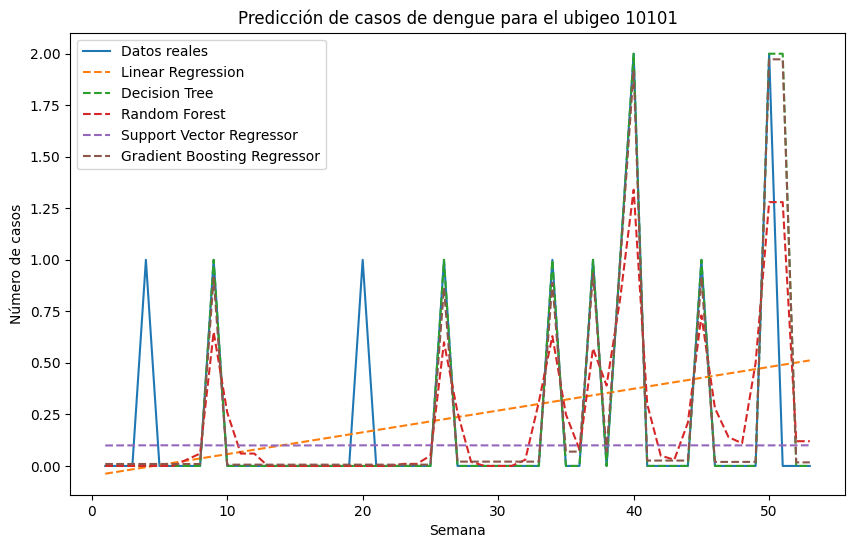

In [44]:
# Visualizar los resultados de un ubigeo específico
plt.figure(figsize=(10, 6))
plt.plot(X, data_transposed[ubigeo_to_plot], label='Datos reales')
plt.plot(X, models[ubigeo_to_plot]['Linear Regression'].predict(X), label='Linear Regression', linestyle='--')
plt.plot(X, models[ubigeo_to_plot]['Decision Tree'].predict(X), label='Decision Tree', linestyle='--')
plt.plot(X, models[ubigeo_to_plot]['Random Forest'].predict(X), label='Random Forest', linestyle='--')
plt.plot(X, models[ubigeo_to_plot]['Support Vector Regressor'].predict(X), label='Support Vector Regressor', linestyle='--')
plt.plot(X, models[ubigeo_to_plot]['Gradient Boosting Regressor'].predict(X), label='Gradient Boosting Regressor', linestyle='--')
plt.xlabel('Semana')
plt.ylabel('Número de casos')
plt.title(f'Predicción de casos de dengue para el ubigeo {ubigeo_to_plot}')
plt.legend()
plt.show()

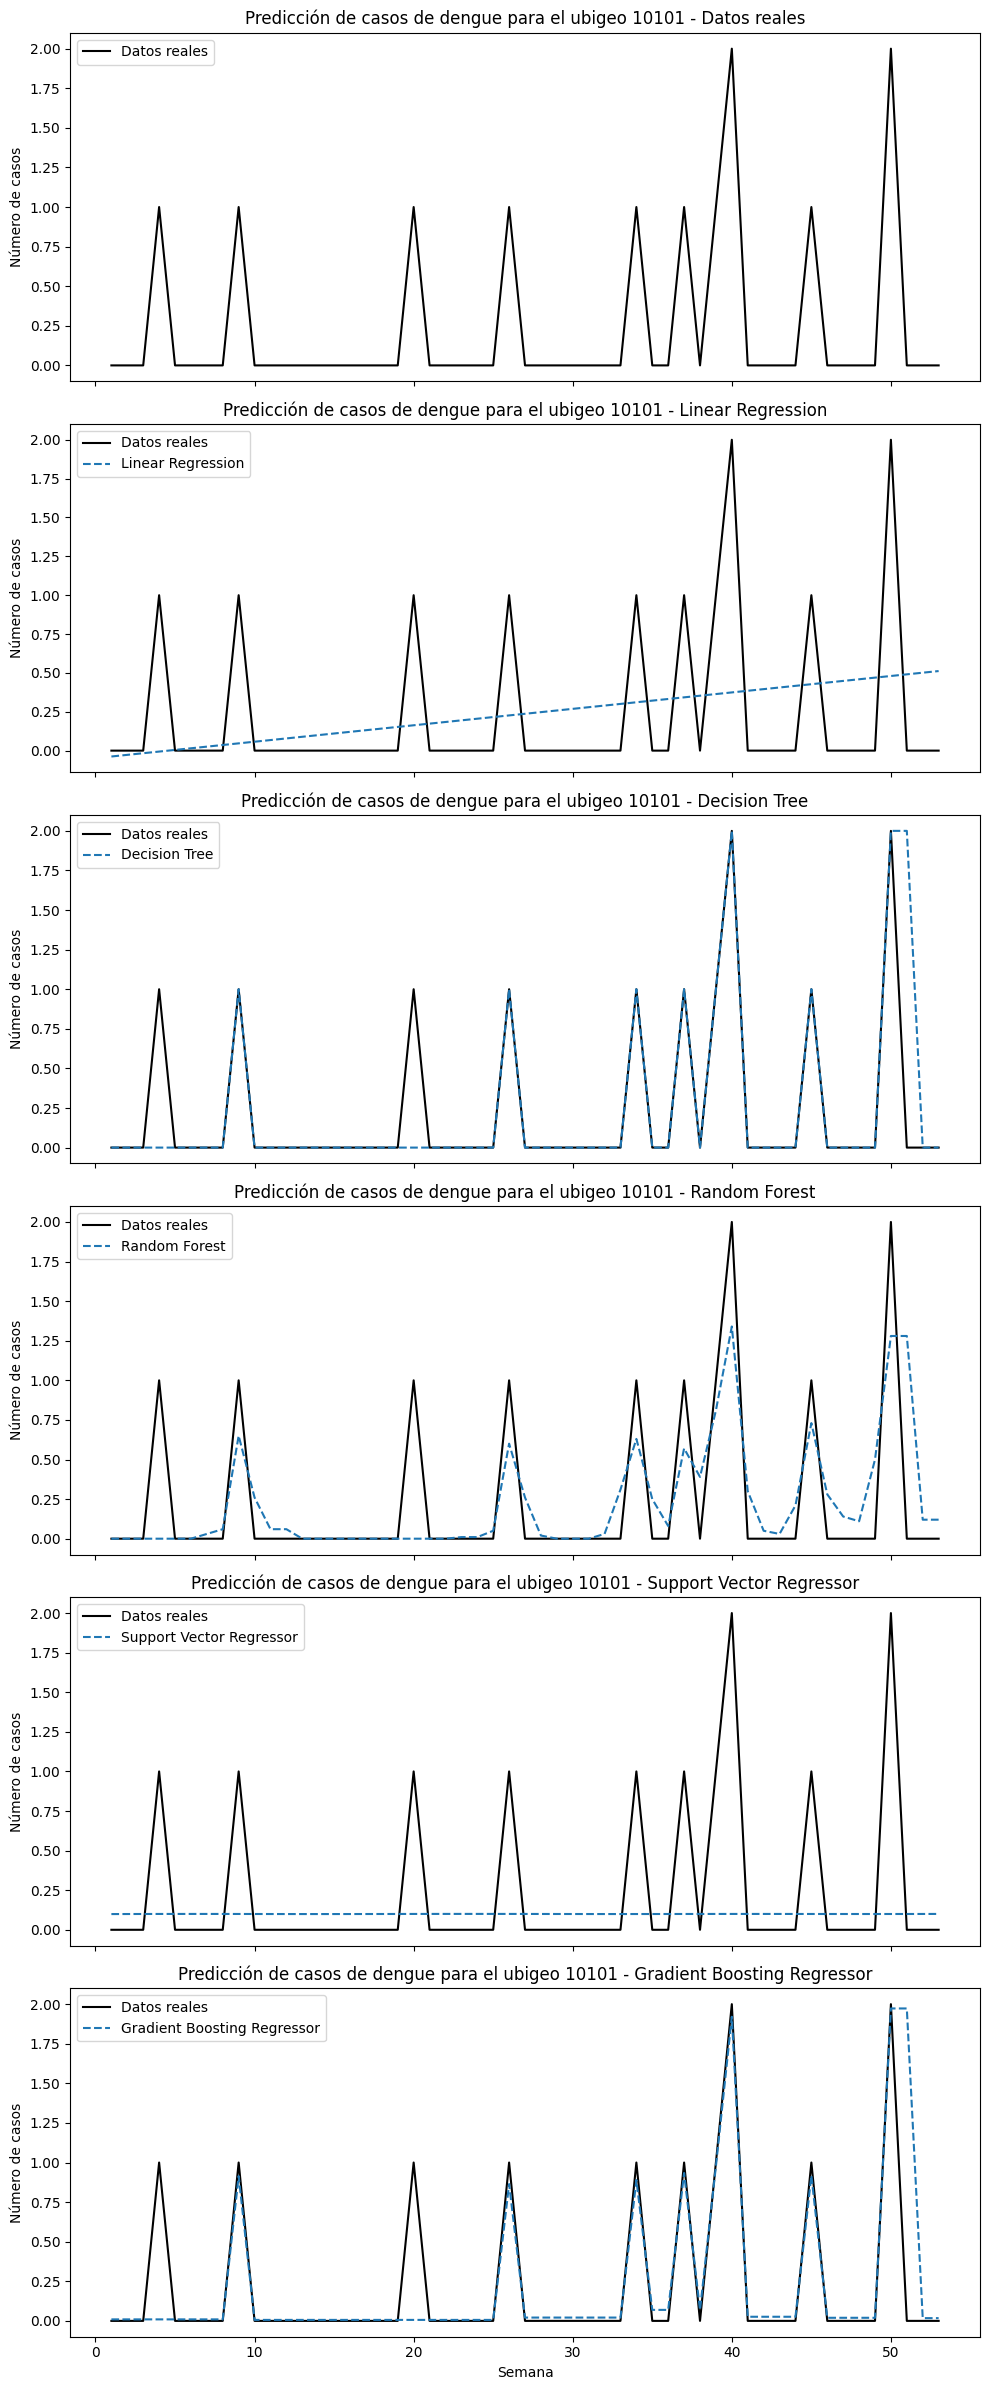

In [47]:
# Definir el número de filas y columnas de subgráficos
n_models = len(models[ubigeo_to_plot])
fig, axs = plt.subplots(n_models+1, 1, figsize=(10, (n_models+1) * 4), sharex=True)

# Títulos de los modelos
model_titles = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor', 'Gradient Boosting Regressor']

# Datos reales
axs[0].plot(X, data_transposed[ubigeo_to_plot], label='Datos reales', color='black')
axs[0].set_title(f'Predicción de casos de dengue para el ubigeo {ubigeo_to_plot} - Datos reales')
axs[0].set_ylabel('Número de casos')
axs[0].legend()

# Añadir las predicciones de cada modelo en subgráficos separados
for i, model_title in enumerate(model_titles):
    axs[i + 1].plot(X, data_transposed[ubigeo_to_plot], label='Datos reales', color='black')
    axs[i + 1].plot(X, models[ubigeo_to_plot][model_title].predict(X), label=model_title, linestyle='--')
    axs[i + 1].set_title(f'Predicción de casos de dengue para el ubigeo {ubigeo_to_plot} - {model_title}')
    axs[i + 1].set_ylabel('Número de casos')
    axs[i + 1].legend()

# Configurar etiquetas comunes
plt.xlabel('Semana')
plt.tight_layout()
plt.show()
